# Im building a Regression Model to predict my body weight in kg 

In [147]:
"""importing libraries"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
from keras.utils import to_categorical


In [148]:
"""Loading the dataset into a data frame and sumarising the data"""
import chardet

with open(r'C:\Users\ppuga\Downloads\Weight_2.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
df = pd.read_csv(r'C:\Users\ppuga\Downloads\Weight_2.csv', encoding=result['encoding'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Day             994 non-null    object 
 1   Date            994 non-null    object 
 2   Workout         994 non-null    object 
 3   Weight(Kg)      994 non-null    object 
 4   Bodyfat %       994 non-null    object 
 5   Calorie_intake  994 non-null    object 
 6   Step_count      994 non-null    int64  
 7   Distance_m      994 non-null    float64
 8   Calories_burnt  994 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.0+ KB


In [149]:
"""Inspecting the data"""
df.head(-5)

,Day,Date,Workout,Weight(Kg),Bodyfat %,Calorie_intake,Step_count,Distance_m,Calories_burnt
0,Monday,22/06/2020,N,91.3,20.7,2703,7073,5286.8010,368.900000
1,Tuesday,23/06/2020,Y,91.7,21.70,2703,3736,2780.1797,185.739960
2,Wednesday,24/06/2020,Y,91.3,22.80,2703,1692,1264.4500,83.049995
3,Thursday,25/06/2020,N,92.5,21.60,2703,8472,6387.8687,435.970000
4,Friday,26/06/2020,Y,91.7,22.50,2703,5606,4186.4320,281.840820
...,...,...,...,...,...,...,...,...,...
984,Friday,3/03/2023,Y,94.3,22.30,2522,10908,7621.3647,1232.553200
985,Saturday,4/03/2023,Y,94.4,21.90,2522,10410,6954.8400,919.983900
986,Sunday,5/03/2023,N,94.2,22.30,2522,11954,8728.9540,629.399900
987,Monday,6/03/2023,Y,94.5,22.60,2503,11065,7668.5740,939.660300


# Data Cleaning

In [150]:
"""As some of the features are objects and I need them to be floats I will convert them all into floats"""
df['Weight(Kg)'] = df['Weight(Kg)'].astype('float64')
df['Calorie_intake'] = df['Calorie_intake'].astype('float64')


In [151]:
"""Inspecting the Bodyfat % column I will need to clean some spaces and typos """
df['Weight(Kg)'].unique()

array([91.3 , 91.7 , 92.5 , 91.9 , 92.  , 92.3 , 91.2 , 92.1 , 91.5 ,
       91.6 , 91.1 , 90.9 , 91.8 , 90.8 , 91.  , 90.5 , 91.4 , 92.2 ,
       91.85, 91.55, 92.7 , 92.6 , 92.05, 92.4 , 93.2 , 92.9 , 92.75,
       94.3 , 94.6 , 93.6 , 93.4 , 93.  , 93.5 , 94.4 , 94.5 , 94.1 ,
       94.7 , 94.8 , 95.2 , 95.3 , 94.9 , 95.6 , 95.5 , 94.  , 95.  ,
       93.9 , 93.8 , 93.7 , 95.1 , 96.  , 96.2 , 95.4 , 94.2 , 95.8 ,
       93.3 , 93.1 , 92.8 , 95.7 , 95.9 , 96.3 , 96.4 , 96.5 , 96.6 ,
       96.7 , 97.  , 97.6 , 97.2 , 97.1 , 96.8 , 96.9 , 97.3 , 97.5 ,
       98.  , 97.8 , 97.9 , 98.5 , 97.7 , 96.1 , 97.4 ,  9.  ])

In [152]:
"""CLeaning the Bodyfat % column and then convert into float"""
# Strip whitespace from 'Bodyfat %' column
#df['Bodyfat %'] = df['Bodyfat %'].str.strip()

# Remove non-numeric characters from 'Bodyfat %' column
df['Bodyfat %'] = df['Bodyfat %'].str.replace('g', '')

# Convert 'Bodyfat %' column to float
#df['Bodyfat %'] = df['Bodyfat %'].astype('float64')

# Calculate summary statistics
#summary = df['Bodyfat %'].describe()
#print(summary)

In [153]:
"""convert the 'Date' column to datetime format and fixing a couple of typos"""


# Replace incorrect dates
#df['Date'] = df['Date'].replace('19/13/20', '19/12/20')
#df['Date'] = df['Date'].replace('26/13/20', '26/12/20')

# Remove extra whitespace
#df['Date'] = df['Date'].str.strip()

# Convert to datetime
#df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')


"convert the 'Date' column to datetime format and fixing a couple of typos"

In [154]:
# convert the "Workout" column to categorical
#df['Workout'] = df['Workout'].astype('category')
# One-hot encode the "workout" column
df = pd.get_dummies(df, columns=["Workout"])
df.head()

,Day,Date,Weight(Kg),Bodyfat %,Calorie_intake,Step_count,Distance_m,Calories_burnt,Workout_N,Workout_Y
0,Monday,22/06/2020,91.3,20.7,2703.0,7073,5286.8010,368.900000,1,0
1,Tuesday,23/06/2020,91.7,21.70,2703.0,3736,2780.1797,185.739960,0,1
2,Wednesday,24/06/2020,91.3,22.80,2703.0,1692,1264.4500,83.049995,0,1
3,Thursday,25/06/2020,92.5,21.60,2703.0,8472,6387.8687,435.970000,1,0
4,Friday,26/06/2020,91.7,22.50,2703.0,5606,4186.4320,281.840820,0,1


In [155]:
"""Making sure the dtypes are correct"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Day             994 non-null    object 
 1   Date            994 non-null    object 
 2   Weight(Kg)      994 non-null    float64
 3   Bodyfat %       994 non-null    object 
 4   Calorie_intake  994 non-null    float64
 5   Step_count      994 non-null    int64  
 6   Distance_m      994 non-null    float64
 7   Calories_burnt  994 non-null    float64
 8   Workout_N       994 non-null    uint8  
 9   Workout_Y       994 non-null    uint8  
dtypes: float64(4), int64(1), object(3), uint8(2)
memory usage: 64.2+ KB


In [156]:
"""
Checking the values for the correlation between the label Weight (Kg) and all the other features"""
df.corr()['Weight(Kg)'].sort_values()

Calorie_intake   -0.205039
Step_count       -0.138916
Distance_m       -0.133368
Calories_burnt   -0.126817
Workout_N        -0.017199
Workout_Y         0.017199
Weight(Kg)        1.000000
Name: Weight(Kg), dtype: float64

<AxesSubplot:>

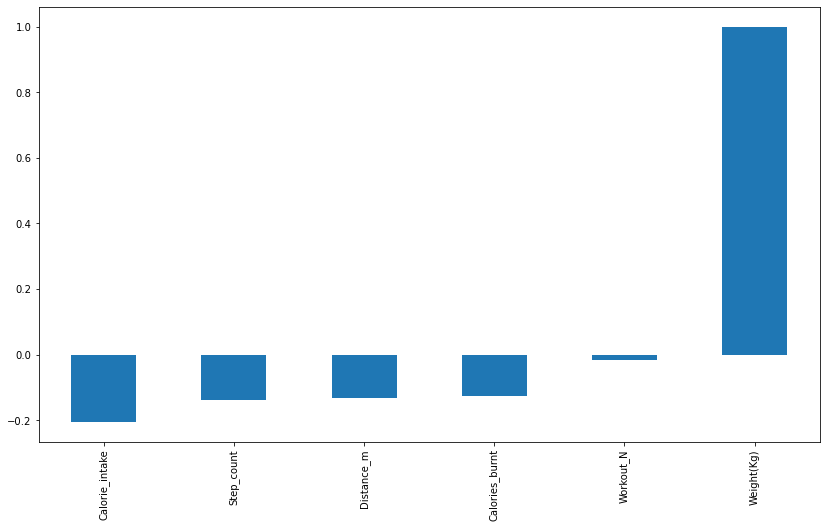

In [157]:
"""Visualsing the correlation of features vs the label"""
plt.figure(figsize=(14,8))
df.corr()['Weight(Kg)'][:-1].sort_values().plot(kind ='bar')

# DF Split and Modeling

In [158]:
"""Building a Linear Regression Model"""
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X = df.drop(['Weight(Kg)', 'Date','Day','Distance_m','Calories_burnt','Calorie_intake'], axis=1)
y = df['Weight(Kg)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear regression model object
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using metrics such as mean squared error and R-squared
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))


Mean squared error: 16.265259076555814
R-squared: 0.3877123975225105


In [159]:
"""Decision Tree Model"""
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X = df.drop(['Weight(Kg)', 'Date', 'Day', 'Distance_m'], axis=1)
y = df['Weight(Kg)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree regression model object
model = DecisionTreeRegressor(random_state=42,max_depth=100,max_leaf_nodes=5)

# Fit the model on the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using metrics such as mean squared error and R-squared
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))


Mean squared error: 25.436184386695494
R-squared: 0.04248310580227144


In [160]:
"""Random Forest Model"""
from sklearn.ensemble import RandomForestRegressor


# Split the data into training and testing sets
X = df.drop(['Weight(Kg)', 'Date', 'Day'], axis=1)
y = df['Weight(Kg)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a random forest regression model object
model = RandomForestRegressor(n_estimators=10, random_state=42,max_leaf_nodes=50,max_depth=9)

# Fit the model on the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using metrics such as mean squared error and R-squared
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))


Mean squared error: 24.835699193534754
R-squared: 0.06508770358415172


#  SO after 3 experiments with different models the best results I had was with the Linear Regression Model
